In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("../projects/churn_dataset.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df["TotalCharges"].dtype

dtype('O')

In [7]:
df["TotalCharges"].astype(float)

ValueError: could not convert string to float: ' '

- In **TotalCharges contains the space values instand of numeric values** that's why it get **error** then we want **replace with** that space with **nan value** then we convert to numeric values

In [8]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)


In [9]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [10]:
df["TotalCharges"].dtype

dtype('float64')

In [11]:
df["TotalCharges"].isnull().sum()

np.int64(11)

In [12]:
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

C:\Users\Aravind\AppData\Local\Temp\ipykernel_12308\1479199042.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [13]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
df.describe(include="object")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [17]:
churn_rate = df['Churn'].value_counts(normalize=True)* 100 
print(churn_rate)


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [18]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

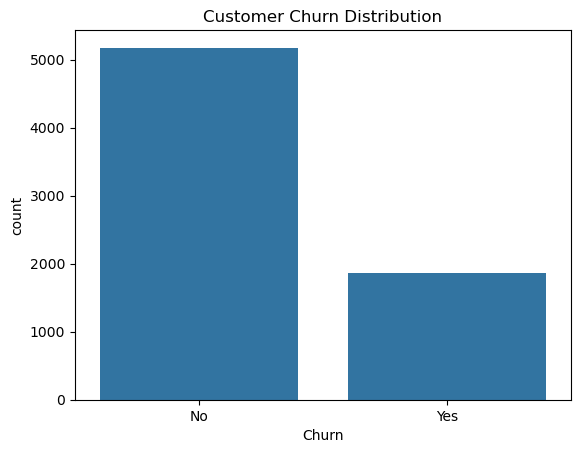

In [19]:
sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Distribution")
plt.show()

- Most customers remain with the company, but a considerable portion has churned, indicating moderate customer attrition.
- Majority of customers did NOT churn
- The count of “No” is much higher than “Yes”.
- This means most customers are retained. 

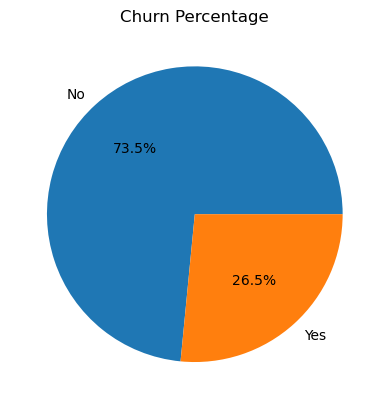

In [20]:
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Churn Percentage")
plt.ylabel("")
plt.show()

- **Out of 100%** ,``26.5%`` **of people are left** the Telecommunications in this dataset.remaining are stays.
- Around 1 out of every 4 customers left.

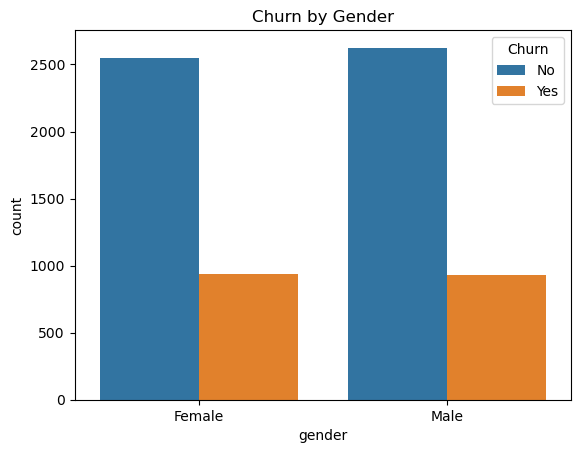

In [21]:
sns.countplot(x='gender', hue='Churn', data=df)
plt.title("Churn by Gender")
plt.show()

- **Male and female customers are almost equally distributed**
- The number of churned customers is nearly the same for males and females.
- No major difference in churn behavior based on gender.
- so,Gender does not appear to be a strong factor influencing customer churn.

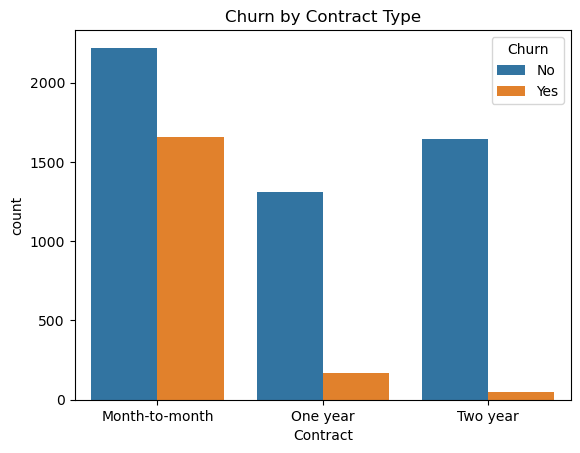

In [25]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.xticks(rotation=0)
plt.show()

- Month-to-month customers have the highest churn.
- It means,This indicates short-term plans have high risk.
- Customers with one-year and two-year contracts rarely churn.
-It means, Long commitments increase customer retention.
- **finally,Customers with month-to-month contracts show the highest churn, while long-term contract customers exhibit strong retention.**

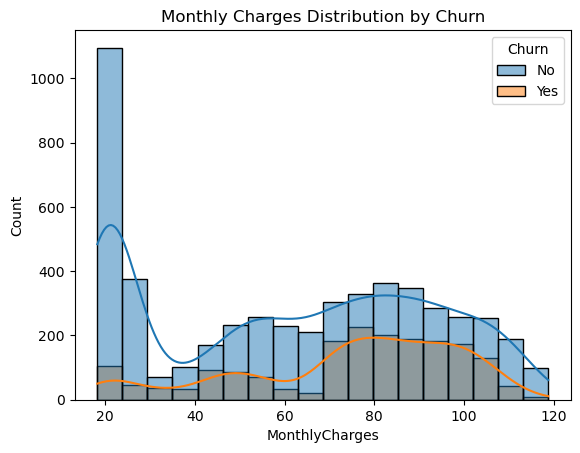

In [28]:
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True)
plt.title("Monthly Charges Distribution by Churn")
plt.show()

- Customers with higher monthly charges churn more
- It means,This suggests pricing affects churn.
- Customers paying lower monthly charges have lower churn rates.
- The distribution curves show noticeable differences between churned and retained customers
- **Customers with higher monthly charges exhibit higher churn rates compared to those with lower charges**

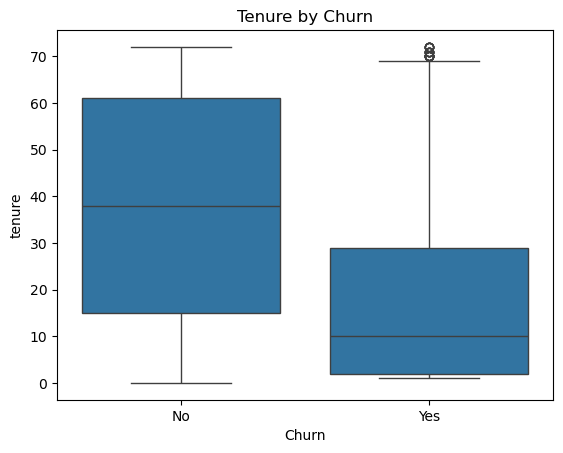

In [29]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure by Churn")
plt.show()

- Most churned customers have short tenure (recently joined).
- This shows new customers are more likely to leave.
- Customers who stayed longer with the company show very low churn.
- Customers with shorter tenure exhibit significantly higher churn compared to long-term customers.

In [32]:
n=df.pivot_table(
    values="MonthlyCharges",
    index="Contract",
    columns="Churn",
    aggfunc="mean")
n


Churn,No,Yes
Contract,,
Month-to-month,61.462635,73.019396
One year,62.508148,85.050904
Two year,60.012477,86.777083


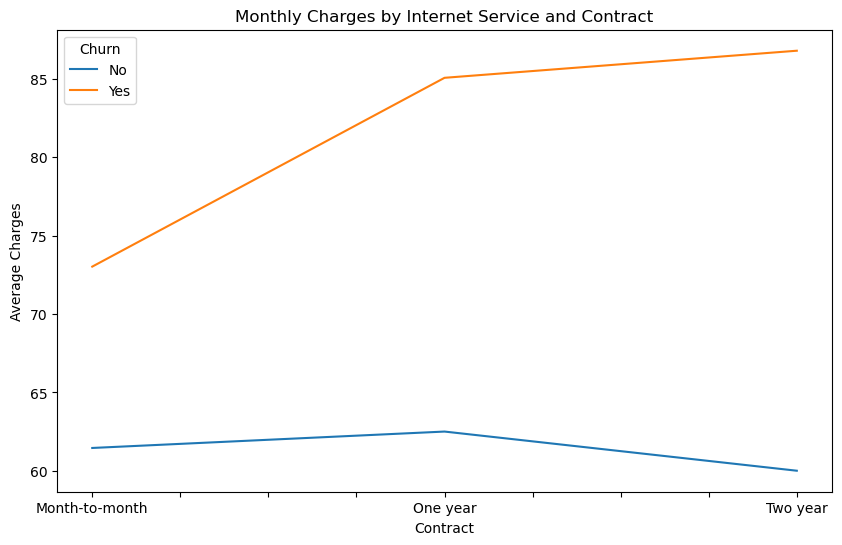

In [34]:
n.plot(figsize=(10,6))
plt.title("Monthly Charges by Internet Service and Contract")
plt.ylabel("Average Charges")
plt.show()

- Month-to-month contracts have the highest charges
    - Customers with month-to-month plans show the highest average monthly charges 
- Long-term contracts have lower charges
    - One-year and two-year contracts have comparatively lower average monthly costs.
- finally,Customers with higher monthly charges, especially those on month-to-month contracts, exhibit higher churn compared to long-term contract customers.

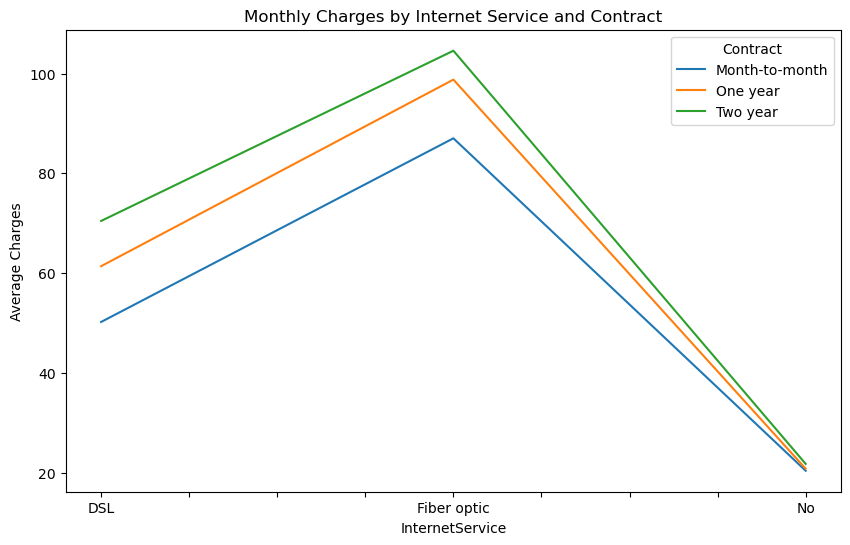

In [35]:
m = df.pivot_table(
    values="MonthlyCharges",
    index="InternetService",
    columns="Contract",
    aggfunc="mean")
m.plot(figsize=(10,6))
plt.title("Monthly Charges by Internet Service and Contract")
plt.ylabel("Average Charges")
plt.show()


- Fiber optic service has the highest charges
   - Customers using fiber optic internet pay the highest average monthly charges.
   - It is the most expensive service type.
- No internet service has the lowest charges
- Fiber optic users and month-to-month contract customers have the highest average monthly charges, while long-term contracts and no-internet users incur lower costs.

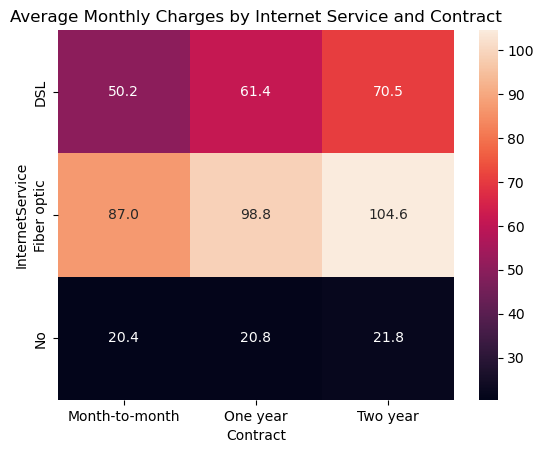

In [36]:
sns.heatmap(m, annot=True, fmt=".1f")
plt.title("Average Monthly Charges by Internet Service and Contract")
plt.show()

- Fiber optic service has the highest monthly charges
    - The darkest cells appear in the fiber optic row, indicating the highest average charges.
- Month-to-month contracts are the most expensive
    - Across all internet service types, month-to-month plans show higher charges than long-term contracts.
- One-year and two-year contracts consistently have lower average monthly charges
- No internet service customers pay the least
    - The lightest cells appear for customers with no internet service.
- Fiber optic customers on month-to-month contracts incur the highest monthly charges, while long-term contracts and no-internet services have the lowest charges. 